In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

In [113]:
# Leer el archivo CSV
options = pd.read_csv('options20240101_20220101.csv')
stocks = pd.read_csv('AAPL_completo.csv', parse_dates=['Date'], dayfirst=False, infer_datetime_format=False, date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y', errors='coerce'))
stocks = stocks.round(2)
# Convertir la columna 'Timestamp' al formato de fecha adecuado
options['Timestamp'] = pd.to_datetime(options['Timestamp'], utc = True)

C:\Users\lasom\AppData\Local\Temp\ipykernel_18324\2886540200.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stocks = pd.read_csv('AAPL_completo.csv', parse_dates=['Date'], dayfirst=False, infer_datetime_format=False, date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y', errors='coerce'))
C:\Users\lasom\AppData\Local\Temp\ipykernel_18324\2886540200.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stocks = pd.read_csv('AAPL_completo.csv', parse_dates=['Date'], dayfirst=False, infer_datetime_format=False, date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y', errors='coerce'))


In [114]:
options.head()

,Volume,Volume Weighted,Open,Close,High,Low,Timestamp,Number of Trades
0,131577921.0,153.1029,154.925,152.06,155.830,151.49,2022-05-09 04:00:00+00:00,1103707
1,115366736.0,154.8376,155.520,154.51,156.740,152.93,2022-05-10 04:00:00+00:00,988257
2,142547625.0,149.4468,153.500,146.50,155.450,145.81,2022-05-11 04:00:00+00:00,1310796
3,182408091.0,142.0660,142.770,142.56,146.200,138.80,2022-05-12 04:00:00+00:00,1678454
4,113990852.0,146.3255,144.590,147.11,148.105,143.11,2022-05-13 04:00:00+00:00,920506


In [103]:
stocks.head()

,Date,Open,High,Low,Adj Close,Volume
0,2002-01-02,0.39,0.42,0.39,0.36,529496800
1,2002-01-03,0.41,0.42,0.41,0.36,612007200
2,2002-01-04,0.42,0.43,0.41,0.36,409976000
3,2002-01-07,0.42,0.43,0.41,0.35,444584000
4,2002-01-08,0.41,0.41,0.40,0.35,450038400


In [116]:
# Extraer la parte de la fecha (año, mes y día)
options['Date'] = options['Timestamp'].dt.date

# Eliminar la columna 'Timestamp'
options.drop('Timestamp', axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame resultante
# print(df.head())

# Encuentra la fecha más temprana
earliest_date = options['Date'].min()

# Encuentra la fecha más reciente
latest_date = options['Date'].max()

print("La fecha más temprana en el conjunto de datos es:", earliest_date)
print("La fecha más reciente en el conjunto de datos es:", latest_date)

La fecha más temprana en el conjunto de datos es: 2022-05-09
La fecha más reciente en el conjunto de datos es: 2023-12-29


In [117]:
options = options[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Number of Trades']]

In [118]:
options.head()

,Date,Open,High,Low,Close,Volume,Number of Trades
0,2022-05-09,154.925,155.830,151.49,152.06,131577921.0,1103707
1,2022-05-10,155.520,156.740,152.93,154.51,115366736.0,988257
2,2022-05-11,153.500,155.450,145.81,146.50,142547625.0,1310796
3,2022-05-12,142.770,146.200,138.80,142.56,182408091.0,1678454
4,2022-05-13,144.590,148.105,143.11,147.11,113990852.0,920506


In [105]:
selected_rows = stocks[(stocks['Date'] >= '2022-05-09') & (stocks['Date'] <= '2023-12-29')]


In [107]:
selected_rows = selected_rows.head(60)

C:\Users\lasom\AppData\Local\Temp\ipykernel_18324\948538951.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\lasom\AppData\Local\Temp\ipykernel_18324\948538951.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


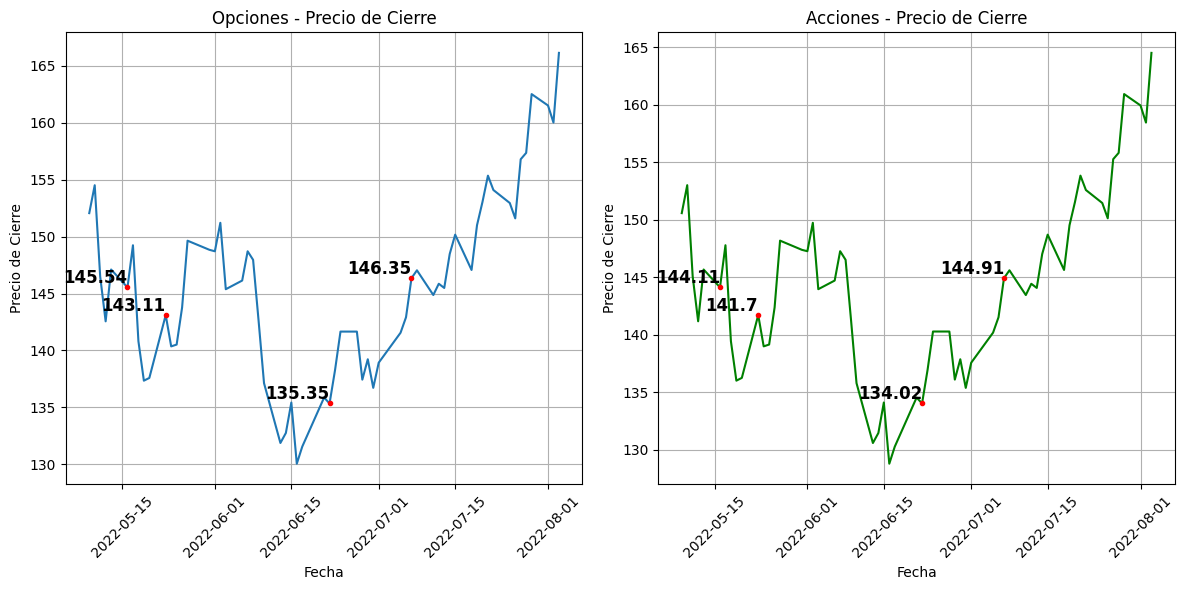

In [110]:
import matplotlib.pyplot as plt

# Crear una figura y dos subtramas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar el precio de cierre de las opciones
options_first = options.head(60)
ax1.plot(options_first['Date'], options_first['Close'], label='Precio de Cierre')
ax1.set_title('Opciones - Precio de Cierre')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de Cierre')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(True)
# Añadir marcadores solo en algunos puntos de datos específicos
marker_indices = [5, 10, 30, 40]
for index in marker_indices:
    x_value = options_first['Date'].iloc[index]
    y_value = options_first['Close'].iloc[index]
    ax1.plot(x_value, y_value, marker='o', markersize=3, color='red')
    ax1.text(x_value, y_value, f'{y_value}', ha='right', va='bottom', color='black', fontsize=12, weight='bold')
    
# Graficar el precio de cierre de las acciones
ax2.plot(selected_rows['Date'], selected_rows['Adj Close'], label='Precio de Cierre', color = 'green')
ax2.set_title('Acciones - Precio de Cierre')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio de Cierre')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(True)
# Añadir marcadores solo en algunos puntos de datos específicos
marker_indices = [5, 10, 30, 40]
for index in marker_indices:
    x_value = selected_rows['Date'].iloc[index]
    y_value = selected_rows['Adj Close'].iloc[index]
    ax2.plot(x_value, y_value, marker='o', markersize=3, color='red')
    ax2.text(x_value, y_value, f'{y_value}', ha='right', va='bottom', color='black', fontsize=12, weight='bold')

# Ajustar el diseño de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [120]:
print(len(stocks))

5620


In [122]:
options.to_csv('options.csv', index=False)
stocks.to_csv('stocks.csv', index=False)